In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

In [3]:
file_path = "/Users/atenafazeli/Desktop/ML/Linear_Regression/Fuel_consumption/fuel_consumption.csv"

df = pd.read_csv(file_path)

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head (9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,6.7,8.5,196
1,2.4,4,7.7,9.6,221
2,1.5,4,5.8,5.9,136
3,3.5,6,9.1,11.1,255
4,3.5,6,8.7,10.6,244
5,3.5,6,7.7,10.0,230
6,3.5,6,8.1,10.1,232
7,3.7,6,9.0,11.1,255
8,3.7,6,9.5,11.6,267


<function matplotlib.pyplot.show(close=None, block=None)>

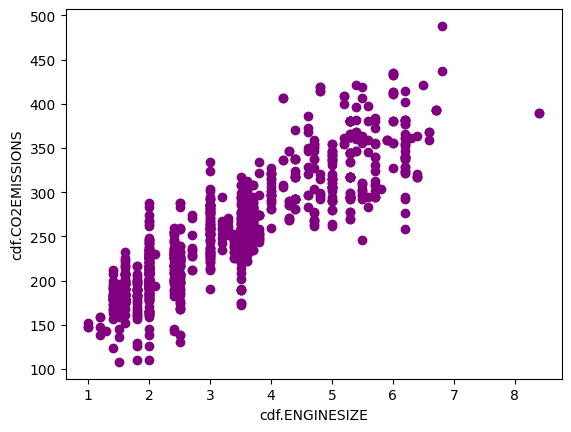

In [5]:
plt. scatter (cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'purple')
plt.xlabel ('cdf.ENGINESIZE')
plt.ylabel ('cdf.CO2EMISSIONS')
plt.show

In [6]:
msk = np.random.rand (len (df)) < 0.8
train = cdf[msk]
test = cdf [~msk]
print (msk)
print (~msk)
print (cdf)
print (train)
print (test)

[False  True  True ...  True  True False]
[ True False False ... False False  True]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
0            2.0          4                  6.7                   8.5   
1            2.4          4                  7.7                   9.6   
2            1.5          4                  5.8                   5.9   
3            3.5          6                  9.1                  11.1   
4            3.5          6                  8.7                  10.6   
...          ...        ...                  ...                   ...   
1062         3.0          6                  9.8                  11.8   
1063         3.2          6                  9.5                  11.5   
1064         3.0          6                  9.8                  11.8   
1065         3.2          6                  9.3                  11.3   
1066         3.2          6                 10.2                  12.8   

      CO2EMISSIONS  
0     

#### Modeling

In [9]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[11.03446955  6.95619372  9.66221375]]
Intercept:  [66.98125055]


#### Plot the Fit Line

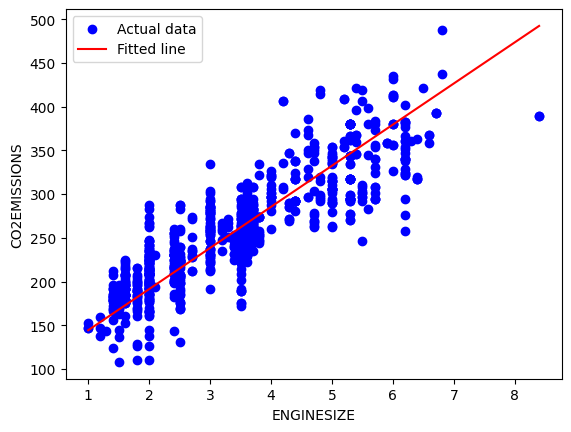

In [17]:
coefficients = regr.coef_[0]
intercept = regr.intercept_[0]

def fitted_line(x1, x2, x3):
    return coefficients[0]*x1 + coefficients[1]*x2 + coefficients[2]*x3 + intercept

plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue', label='Actual data')

x1_values = np.linspace(min(train['ENGINESIZE']), max(train['ENGINESIZE']), 100)
x2_values = np.linspace(min(train['CYLINDERS']), max(train['CYLINDERS']), 100)
x3_values = np.linspace(min(train['FUELCONSUMPTION_COMB']), max(train['FUELCONSUMPTION_COMB']), 100)
y_values = fitted_line(x1_values, x2_values, x3_values)

plt.plot(x1_values, y_values, color='red', label='Fitted line')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()



In [14]:
test_x = np.asanyarray (test [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray (test [['CO2EMISSIONS']])
y_hat = regr.predict(test_x)

print ("Mean Squared Error:%.2f " % np.mean((y_hat - test_y)** 2))
print ("variance score: %.2f" % regr.score (test_x, test_y))

Mean Squared Error:569.33 
variance score: 0.87
